In [1]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
years = range(2009, 2019)

## Load Data

In [6]:
graphs = []  # save as array of networks
for i in years:
    eval(f"graphs.append(create_graph(pd.read_csv('data/{i}_grouped.csv')))")  # use `eval` for automation

## Map Plots

In [4]:
# for i in years: 
#     eval(f"viz_map(pd.read_csv('data/{i}_grouped.csv'), {i})")

## 1b GINI

In [27]:
ginis = []
for i in graphs:
    ginis.append(gini_coef(i))

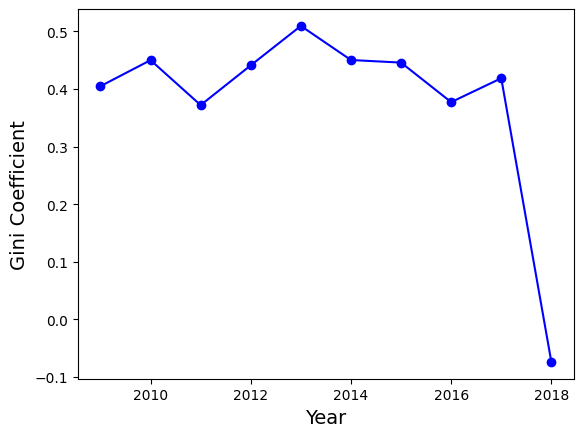

In [41]:

plt.plot(years, ginis, color="b")
plt.scatter(years, ginis, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Gini Coefficient", fontsize=14)
plt.savefig(f"./images/1b_gini.jpg", format="jpg", bbox_inches="tight")


## 1e small world

In [7]:
cluter_coef = []
shortest_path_length = []
for i in graphs:
    cluter_coef.append(clustering_coef(i))
    shortest_path_length.append(average_shortest_path_length)

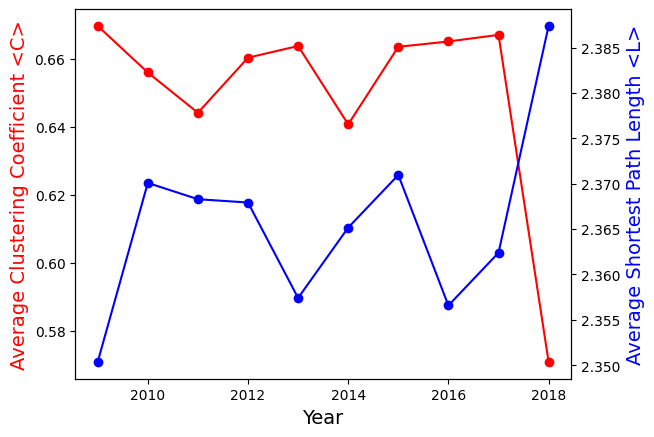

In [42]:
fig, ax = plt.subplots()
ax.plot(years, cluter_coef, color="r")
ax.set_xlabel("Year", fontsize=14)
ax.scatter(years, cluter_coef, color="r")
ax.set_ylabel("Average Clustering Coefficient <C>", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(years, shortest_path_length, color="b")
ax2.scatter(years, shortest_path_length, color="b")
ax2.set_ylabel("Average Shortest Path Length <L>", color="blue", fontsize=14)

plt.savefig(f"./images/1d_small_world.jpg", format="jpg", bbox_inches="tight")


## 2a resilience

This part takes around 1 hour to run on my laptop, so u probably do not want to run it

In [43]:
res = []
for i in graphs:
    res.append(resilience(i))

In [45]:
np.save("resilience.npy", res)

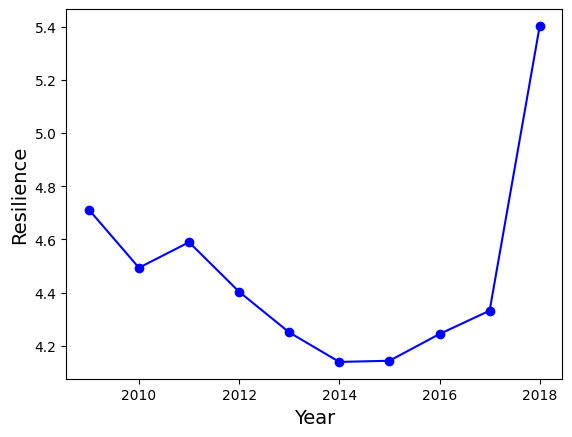

In [44]:
plt.plot(years, res, color="b")
plt.scatter(years, res, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Resilience", fontsize=14)
plt.savefig(f"./images/2a_resilience.jpg", format="jpg", bbox_inches="tight")
